In [ ]:
%pip install pandas -q
%pip install matplotlib
%pip install numpy 
%pip install seaborn

In [35]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

# importing the dataset 
df = pd.read_csv('nasa.csv')

# top 5 rows of the dataset 
df.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,coordinates
0,Aachen,1,Valid,L5,21.0,Fell,1880-01-01,50.77500,6.08333,"[6.08333, 50.775]"
1,Aarhus,2,Valid,H6,720.0,Fell,1951-01-01,56.18333,10.23333,"[10.23333, 56.18333]"
2,Abee,6,Valid,EH4,107000.0,Fell,1952-01-01,54.21667,-113.00000,"[-113, 54.21667]"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976-01-01,16.88333,-99.90000,"[-99.9, 16.88333]"
4,Achiras,370,Valid,L6,780.0,Fell,1902-01-01,-33.16667,-64.95000,"[-64.95, -33.16667]"


## Get all the Earth meteorites that fell before the year 2000

In [44]:
# changing the datatype 
df['year'] = pd.to_datetime(df['year'])

In [16]:
df_1 = df[df['year'].dt.year<2000]
print(f"Total Earth meteorites that fell before the year 2000: {df_1.shape[0]}")
df_1.sample(5)

Total Earth meteorites that fell before the year 2000: 912


,name,id,nametype,recclass,mass,fall,year,reclat,reclong,coordinates
750,Padvarninkai,18069,Valid,Eucrite-mmict,3858.0,Fell,1929-01-01,55.66667,25.00000,"[25, 55.66667]"
703,Noblesville,16985,Valid,H4-6,483.7,Fell,1991-01-01,40.08528,-86.05500,"[-86.055, 40.08528]"
758,Pampanga,18093,Valid,L5,10500.0,Fell,1859-01-01,15.08333,120.70000,"[120.7, 15.08333]"
697,Nikolskoe,16977,Valid,L4,6000.0,Fell,1954-01-01,56.11667,37.33333,"[37.33333, 56.11667]"
408,Jajh deh Kot Lalu,12067,Valid,EL6,973.0,Fell,1926-01-01,26.75000,68.41667,"[68.41667, 26.75]"


In [30]:
df_2 = df[df['year'].dt.year>=2000]

print(f"Total Earth meteorites that fell on and after the year 2000: {df_2.shape[0]}")
df_2.sample(5)

Total Earth meteorites that fell on and after the year 2000: 70


,name,id,nametype,recclass,mass,fall,year,reclat,reclong,coordinates
757,Dominion Range 03239,32591,Valid,L6,69.5,Found,2002-01-01,NaN,NaN,NaN
169,Carancas,45817,Valid,H4-5,342.0,Fell,2007-01-01,-16.66444,-69.04389,"[-69.04389, -16.66444]"
137,Boumdeid (2003),57168,Valid,L6,190.0,Fell,2003-01-01,17.71067,-11.37150,"[-11.3715, 17.71067]"
978,Tamdakht,48691,Valid,H5,100000.0,Fell,2008-01-01,31.16333,-7.01500,"[-7.015, 31.16333]"
99,Bensour,5024,Valid,LL6,45000.0,Fell,2002-01-01,30.00000,-7.00000,"[-7, 30]"


In [31]:
# checking for missing values in dataset
df.isnull().sum()

name            0
id              0
nametype        0
recclass        0
mass           28
fall            0
year           18
reclat         12
reclong        12
coordinates    12
dtype: int64

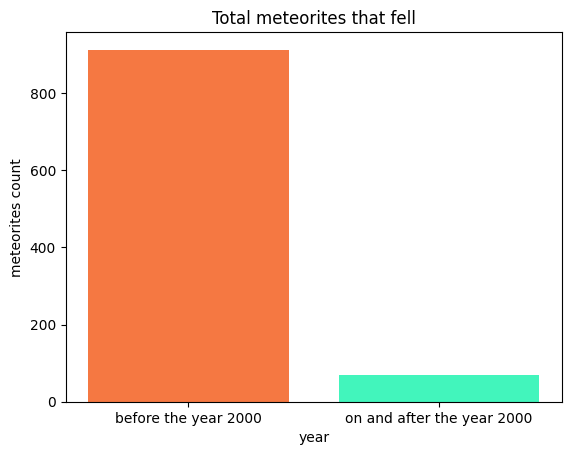

In [41]:
# Get the shape of the DataFrames
df_1_shape = df_1.shape
df_2_shape = df_2.shape

# Set the colors for the bars
colors = ['#f57842', '#42f5bc']

# Create a bar plot to show the shape of the DataFrames
plt.bar(['before the year 2000', 'on and after the year 2000'], [df_1_shape[0], df_2_shape[0]], color=colors)

# Set the labels and title of the plot
plt.xlabel('year')
plt.ylabel('meteorites count')
plt.title('Total meteorites that fell')

# Show the plot
plt.show()


## Get all the earth meteorites co-ordinates who fell before the year 1970

In [58]:
df_3 = df[df['year'].dt.year<1970]

print(f"Total meteorites who fell before the year 1970: {df_3.shape[0]}")

print(f"Earth meteorites co-ordinates who fell before the year 1970:\n{df_3['coordinates']}")

Total meteorites who fell before the year 1970: 763
Earth meteorites co-ordinates who fell before the year 1970:
0          [6.08333, 50.775]
1       [10.23333, 56.18333]
2           [-113, 54.21667]
4        [-64.95, -33.16667]
5               [71.8, 32.1]
               ...          
994             [35.2, 54.5]
995     [79.41667, 13.63333]
997    [111.53333, -7.08333]
998    [106.58333, -6.66667]
999        [34.76667, 47.85]
Name: coordinates, Length: 763, dtype: object


## Assuming that the mass of the earth meteorites was in kg, get all those whose mass was more than 10000kg


Total Earth meteorites whose mass was more than 10000kg: 243
Total Earth meteorites whose mass was less than 10000kg: 722


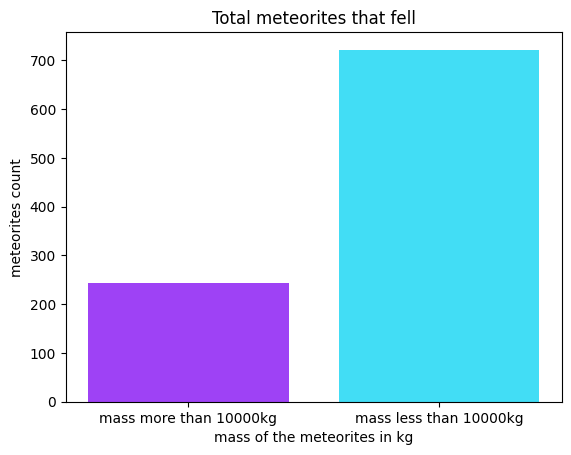

In [74]:
df_4 = df[df['mass']>10000]
df_5 = df[df['mass']<10000]
print(f"Total Earth meteorites whose mass was more than 10000kg: {df_4.shape[0]}")
print(f"Total Earth meteorites whose mass was less than 10000kg: {df_5.shape[0]}")

# Get the shape of the DataFrames
df_4_shape = df_4.shape
df_5_shape = df_5.shape

# Set the colors for the bars
colors = ['#9e42f5', '#42ddf5']

# Create a bar plot to show the shape of the DataFrames
plt.bar(['mass more than 10000kg', 'mass less than 10000kg'], [df_4_shape[0], df_5_shape[0]], color=colors)

# Set the labels and title of the plot
plt.xlabel('mass of the meteorites in kg')
plt.ylabel('meteorites count')
plt.title('Total meteorites that fell')

# Show the plot
plt.show()
